In [425]:
# 필요 패키지 설치 및 데이터 불러오기
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from matplotlib import font_manager

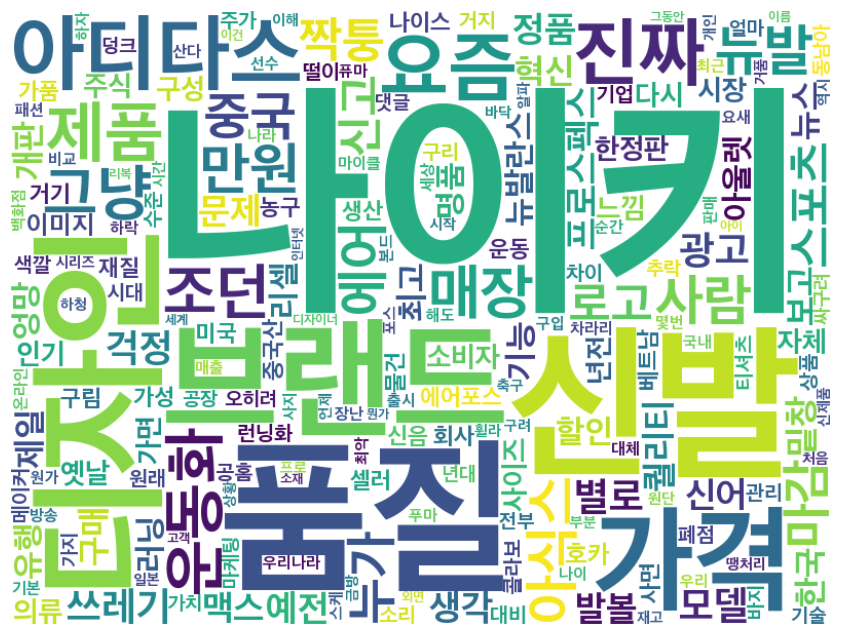

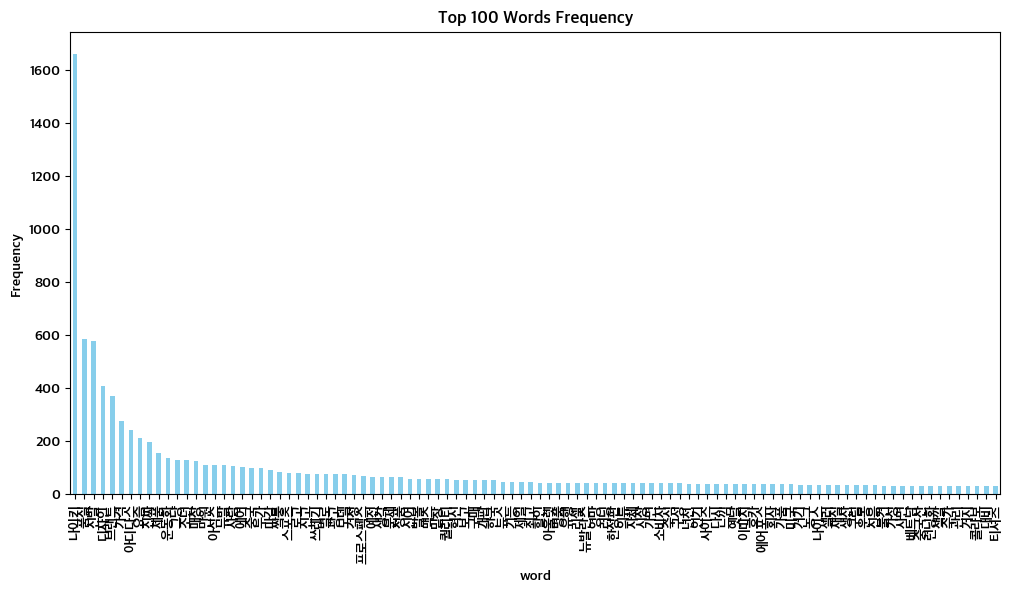

In [459]:
# 1. 데이터 로드
file_path = "nike_youtube_crawling(fix).csv"  # 파일 경로
df = pd.read_csv(file_path)

# 2. 텍스트 전처리
okt = Okt()

# (1) 한글과 공백만 남기기
df['cleaned_comments'] = df['comment'].str.replace(r"[^\uAC00-\uD7A3\s]", "", regex=True)

# (2) 불용어 정의
stopwords = set([
    "그리고", "하지만", "그래서", "또한", "즉", "왜냐하면", "때문에", "때문", "무슨", "그게",
    "이것", "저것", "그것", "너무", "정말", "매우", "아주", "어느", "이", "저", "그",
    "점점", "계속", "다른", "일단", "바로", "가장", "이후", "어디", "부터", "년도", "이상", "등등",
    "정도", "절대","조금", "거의", "사서", "사고","이제","지금","한번","하나","이유"
])

# (3) 명사 추출 및 불용어 제거
def extract_keywords(comment):
    nouns = okt.nouns(comment)  # 명사 추출
    filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]  # 불용어 및 1글자 필터링
    return filtered_nouns

df['nouns'] = df['cleaned_comments'].apply(lambda x: extract_keywords(x))

# (4) 단어 조합 처리
word_pairs = [
    ("가성", "비"),  # 가성비
    ("프로", "스펙스"),  # 프로스펙스
    ("운동", "화"),  # 운동화
]

def combine_word_pairs(tokens, word_pairs):
    combined_tokens = []
    i = 0
    while i < len(tokens):
        for pair in word_pairs:
            if i + len(pair) - 1 < len(tokens) and tuple(tokens[i:i + len(pair)]) == pair:
                combined_tokens.append("".join(pair))  # 단어 조합 결합
                i += len(pair)  # 조합된 단어 수만큼 건너뜀
                break
        else:
            combined_tokens.append(tokens[i])
            i += 1
    return combined_tokens

df['nouns'] = df['nouns'].apply(lambda x: combine_word_pairs(x, word_pairs))

# 3. 단어 빈도 계산
all_nouns = sum(df['nouns'], [])  # 모든 댓글의 명사를 합침
word_counts = Counter(all_nouns)  # 단어 빈도 계산

# 4. 워드클라우드 생성
font_path = "/Users/lovelyjoo/Library/Fonts/AppleSDGothicNeoB.ttf"

wordcloud = WordCloud(font_path=font_path, background_color="white", width=800, height=600)
wordcloud.generate_from_frequencies(word_counts)
wordcloud.to_file("youtube_wordcloud_output(100).png")

plt.figure(figsize=(40, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 5. 빈도 분석 시각화
top_words = word_counts.most_common(100)  # 상위 50개 단어

# 상위 단어 빈도 막대그래프

font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

top_words_df = pd.DataFrame(top_words, columns=["word", "count"])
top_words_df.plot(kind='bar', x='word', y='count', legend=False, figsize=(12, 6), color="skyblue")
plt.title("Top 100 Words Frequency")
plt.ylabel("Frequency")
plt.savefig("youtube_Frequency_output(100).png", bbox_inches='tight')
plt.show()

In [429]:
df

,Unnamed: 0,comment,author,date,num_likes,cleaned_comments,nouns
0,0,해당 영상의 42초 -49초에 나간 장면은 나이키 공식 운영 매장에 해당되지 않습니...,@newskbs,2024-07-12T07:00:43Z,77,해당 영상의 초 초에 나간 장면은 나이키 공식 운영 매장에 해당되지 않습니다 시청자...,"[해당, 영상, 장면, 나이키, 공식, 운영, 매장, 해당, 시청자, 혼선]"
1,1,혼선이 생기게끔 자료화면을 넣어놓고 댓글로 띡 혼선없기 바랍니다?ㅋㅋㅋㅋ공영방송 수...,@wjxhj-ow7jsiq_u6oq2,2024-07-14T00:35:18Z,60,혼선이 생기게끔 자료화면을 넣어놓고 댓글로 띡 혼선없기 바랍니다공영방송 수준이 유큐...,"[혼선, 자료, 화면, 댓글, 혼선, 방송, 수준, 유큐, 버들, 영상]"
2,2,폐점 떨이 할인,@DDEGURURU,2024-07-14T19:22:19Z,1,폐점 떨이 할인,"[폐점, 떨이, 할인]"
3,3,​@@wjxhj-ow7jsiq_u6oq2 딩동댕,@calvinsc5105,2024-07-15T07:15:01Z,3,딩동댕,[딩동댕]
4,4,49초-51초,@jocollet,2024-07-16T22:20:24Z,0,초초,[초초]
...,...,...,...,...,...,...,...
3636,3636,@@soo9035 과연 언제까지 갈까요? 자기자리 못지키면 회사 망하는거 순식간...,@빵집아저씨-l5k,2024-07-08T11:41:20Z,6,과연 언제까지 갈까요 자기자리 못지키면 회사 망하는거 순식간이죠 사람들이 등...,"[과연, 언제, 자기, 회사, 순식간, 사람, 시작]"
3637,3637,@@빵집아저씨-l5k 네 그 아성이 그렇게 쉽게 안망합니다.,@soo9035,2024-07-08T11:44:24Z,1,빵집아저씨 네 그 아성이 그렇게 쉽게 안망합니다,"[빵집, 아저씨, 아성]"
3638,3638,그래도 세계 136위면 대단한데...?,@축구왕조던,2024-07-08T11:54:30Z,0,그래도 세계 위면 대단한데,[세계]
3639,3639,@@빵집아저씨-l5k 본인이 나이키를 평가할 정도가 된다고 생각하시나요 ㅋㅋ,@박태민-j1w,2024-07-08T12:19:25Z,1,빵집아저씨 본인이 나이키를 평가할 정도가 된다고 생각하시나요,"[빵집, 아저씨, 본인, 나이키, 평가, 생각]"


In [324]:
top_words_df

,word,count
0,나이키,1661
1,품질,585
2,신발,577
3,디자인,407
4,브랜드,369
5,가격,273
6,아디다스,241
7,요즘,212
8,진짜,194
9,제품,152


## 단어 전체 분석

In [242]:
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 감정 분석 파이프라인 설정
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="beomi/KcELECTRA-base",
    device=-1  # CPU 모드로 실행
)

# 라벨 매핑
label_mapping = {
    'LABEL_0': 'NEGATIVE',  # Assuming label_0 corresponds to negative sentiment
    'LABEL_1': 'POSITIVE'   # Assuming label_1 corresponds to positive sentiment
}

# 모든 명사 가져오기
all_nouns = list(set([noun for nouns in df['nouns'] for noun in nouns]))

# 개별 명사에 대해 긍부정 분석 수행
positive_words = []
negative_words = []

for noun in all_nouns:
    try:
        result = sentiment_analyzer(noun, truncation=True, max_length=512)
        label = result[0]['label']  # 결과에서 라벨 가져오기

        # 라벨을 더 읽기 쉬운 형태로 매핑
        sentiment = label_mapping.get(label, None)
        if sentiment:
            print(f"Noun: {noun} -> Sentiment: {sentiment}")
            if sentiment == 'POSITIVE':
                positive_words.append(noun)
            elif sentiment == 'NEGATIVE':
                negative_words.append(noun)
        else:
            print(f"Unexpected label '{label}' for noun '{noun}'")
    
    except Exception as e:
        print(f"Error processing noun '{noun}': {e}")

# 중복 제거 및 정리
positive_words = list(set(positive_words))
negative_words = list(set(negative_words))

# 긍정적 워드클라우드 생성
if positive_words:
    positive_wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        width=800,
        height=600
    ).generate(" ".join(positive_words))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Words WordCloud")
    plt.savefig("positive_wordcloud_output.png", bbox_inches='tight')
    plt.show()
else:
    print("No positive words found for the word cloud.")

# 부정적 워드클라우드 생성
if negative_words:
    negative_wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        width=800,
        height=600
    ).generate(" ".join(negative_words))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Words WordCloud")
    plt.savefig("negative_wordcloud_output.png", bbox_inches='tight')
    plt.show()
else:
    print("No negative words found for the word cloud.")


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Noun: 사지 -> Sentiment: NEGATIVE
Noun: 다리 -> Sentiment: NEGATIVE
Noun: 에어도 -> Sentiment: NEGATIVE
Noun: 다말 -> Sentiment: NEGATIVE
Noun: 한지 -> Sentiment: NEGATIVE
Noun: 네이버 -> Sentiment: NEGATIVE
Noun: 미술 -> Sentiment: NEGATIVE
Noun: 옥스 -> Sentiment: NEGATIVE
Noun: 숟가락 -> Sentiment: NEGATIVE
Noun: 판단 -> Sentiment: NEGATIVE
Noun: 죽죽 -> Sentiment: NEGATIVE
Noun: 재미 -> Sentiment: NEGATIVE
Noun: 방법 -> Sentiment: NEGATIVE
Noun: 수집 -> Sentiment: NEGATIVE
Noun: 대형 -> Sentiment: NEGATIVE
Noun: 저리 -> Sentiment: NEGATIVE
Noun: 계열 -> Sentiment: NEGATIVE
Noun: 인식 -> Sentiment: NEGATIVE
Noun: 팔이 -> Sentiment: NEGATIVE
Noun: 레어템 -> Sentiment: NEGATIVE
Noun: 무조건 -> Sentiment: NEGATIVE
Noun: 폐기 -> Sentiment: NEGATIVE
Noun: 개도 -> Sentiment: NEGATIVE
Noun: 카를 -> Sentiment: NEGATIVE
Noun: 신지 -> Sentiment: NEGATIVE
Noun: 버핏 -> Sentiment: NEGATIVE
Noun: 엔버서드 -> Sentiment: NEGATIVE
Noun: 고딩 -> Sentiment: NEGATIVE
Noun: 실소 -> Sentiment: NEGATIVE
Noun: 다기 -> Sentiment: NEGATIVE
Noun: 괴물 -> Sentiment: NEGATIVE
N

KeyboardInterrupt: 

## Top 50 분석

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Noun: 나이키 -> Sentiment: POSITIVE
Noun: 품질 -> Sentiment: NEGATIVE
Noun: 신발 -> Sentiment: NEGATIVE
Noun: 디자인 -> Sentiment: NEGATIVE
Noun: 브랜드 -> Sentiment: NEGATIVE
Noun: 가격 -> Sentiment: NEGATIVE
Noun: 아디다스 -> Sentiment: POSITIVE
Noun: 요즘 -> Sentiment: NEGATIVE
Noun: 진짜 -> Sentiment: NEGATIVE
Noun: 제품 -> Sentiment: NEGATIVE
Noun: 운동화 -> Sentiment: POSITIVE
Noun: 그냥 -> Sentiment: NEGATIVE
Noun: 조던 -> Sentiment: POSITIVE
Noun: 매장 -> Sentiment: NEGATIVE
Noun: 만원 -> Sentiment: NEGATIVE
Noun: 아식스 -> Sentiment: POSITIVE
Noun: 뉴발 -> Sentiment: POSITIVE
Noun: 사람 -> Sentiment: NEGATIVE
Noun: 에어 -> Sentiment: NEGATIVE
Noun: 중국 -> Sentiment: NEGATIVE
Noun: 누가 -> Sentiment: NEGATIVE
Noun: 마감 -> Sentiment: NEGATIVE
Noun: 짝퉁 -> Sentiment: NEGATIVE
Noun: 스포츠 -> Sentiment: NEGATIVE
Noun: 로고 -> Sentiment: POSITIVE
Noun: 신고 -> Sentiment: NEGATIVE
Noun: 쓰레기 -> Sentiment: NEGATIVE
Noun: 별로 -> Sentiment: NEGATIVE
Noun: 광고 -> Sentiment: NEGATIVE
Noun: 모델 -> Sentiment: NEGATIVE
Noun: 걱정 -> Sentiment: NEGATIVE

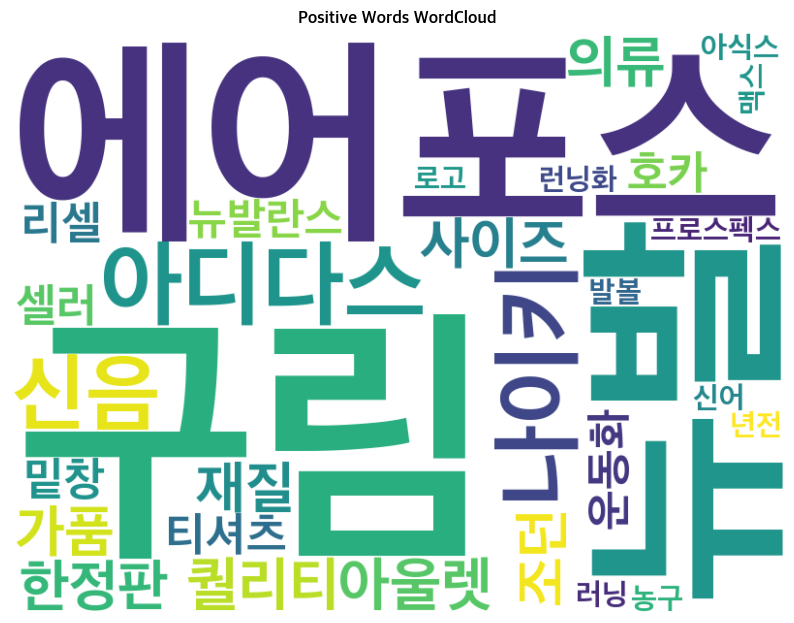

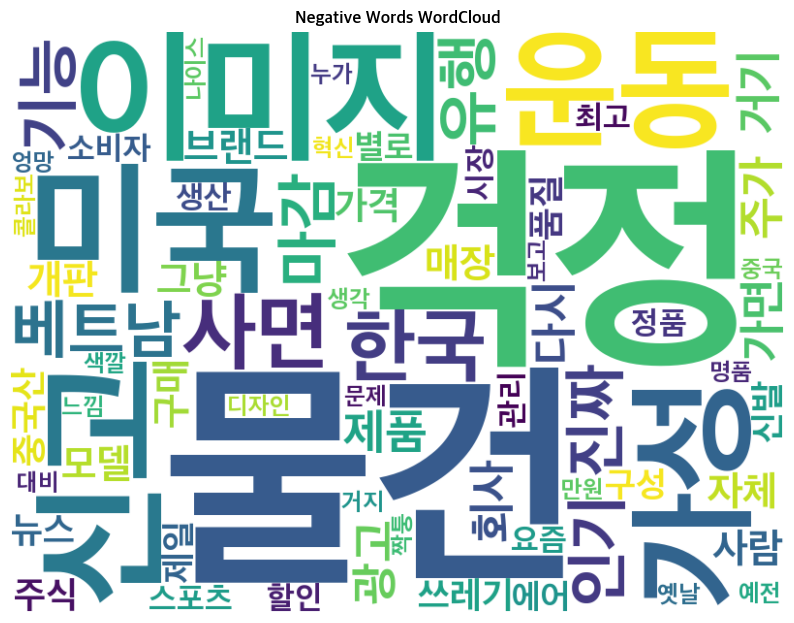

In [491]:
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 감정 분석 파이프라인 설정
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="beomi/KcELECTRA-base",
    device=-1  # CPU 모드로 실행
)

# 라벨 매핑
label_mapping = {
    'LABEL_0': 'POSITIVE',  # Assuming label_0 corresponds to negative sentiment
    'LABEL_1': 'NEGATIVE'   # Assuming label_1 corresponds to positive sentiment
}


top_words = word_counts.most_common(100)

# top_words_df의 명사들만 가져오기
nouns = top_words_df['word'].tolist()

# 개별 명사에 대해 긍부정 분석 수행
positive_words = []
negative_words = []

for noun in nouns:
    try:
        result = sentiment_analyzer(noun, truncation=True, max_length=512)
        label = result[0]['label']  # 결과에서 라벨 가져오기

        # 라벨을 더 읽기 쉬운 형태로 매핑
        sentiment = label_mapping.get(label, None)
        if sentiment:
            print(f"Noun: {noun} -> Sentiment: {sentiment}")
            if sentiment == 'POSITIVE':
                positive_words.append(noun)
            elif sentiment == 'NEGATIVE':
                negative_words.append(noun)
        else:
            print(f"'{label}' for noun '{noun}'")
    
    except Exception as e:
        print(f"Error processing noun '{noun}': {e}")

# 중복 제거 및 정리

positive_words = list(set(positive_words))
negative_words = list(set(negative_words))

# 긍정적 워드클라우드 생성
if positive_words:
    positive_wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        width=800,
        height=600
    ).generate(" ".join(positive_words))


    plt.figure(figsize=(10, 8))
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Words WordCloud")
    plt.savefig("positive_wordcloud_output(100).png", bbox_inches='tight')
    plt.show()
else:
    print("No positive words found for the word cloud.")

# 부정적 워드클라우드 생성
if negative_words:
    negative_wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        width=800,
        height=600
    ).generate(" ".join(negative_words))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Words WordCloud")
    plt.savefig("negative_wordcloud_output(100).png", bbox_inches='tight')
    plt.show()
else:
    print("No negative words found for the word cloud.")

In [451]:
# 긍정적 단어 빈도 분석 및 바 차트 생성
if positive_words:
    positive_word_counts = Counter(positive_words)
    positive_df = pd.DataFrame(positive_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)
else:
    print("No positive words found for the bar chart.")

    p = pd.merge(positive_df, top_words_df, on='word', how='left')
    
    plt.figure(figsize=(12, 6))
    plt.bar(p['word'], p['count'], color='skyblue')
    plt.title("Top 50 Positive Words Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("positive_words_bar_chart(50).png")
    plt.show()


# 부정적 단어 빈도 분석 및 바 차트 생성
if negative_words:
    negative_word_counts = Counter(negative_words)
    negative_df = pd.DataFrame(negative_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)
else:
    print("No negative words found for the bar chart.")

    n = pd.merge(negative_df, top_words_df, on='word', how='left')
    
    plt.figure(figsize=(12, 6))
    plt.bar(n['word'], n['count'], color='lightcoral')
    plt.title("Top 50 Negative Words Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("negative_words_bar_chart(50).png")
    plt.show()

In [455]:
# 긍정적 단어 빈도 분석 및 바 차트 생성
if positive_words:
    positive_word_counts = Counter(positive_words)
    positive_df = pd.DataFrame(positive_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)
else:
    print("No positive words found for the bar chart.")
   
    # 병합 및 시각화
    p = pd.merge(positive_df, top_words_df, on='word', how='left')
    plt.figure(figsize=(12, 6))
    plt.bar(p['word'], p['Count'], color='skyblue')  # 'Count'로 수정
    plt.title("Top 50 Positive Words Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("positive_words_bar_chart(50).png")
    plt.show()

# 부정적 단어 빈도 분석 및 바 차트 생성
if negative_words:
    negative_word_counts = Counter(negative_words)
    negative_df = pd.DataFrame(negative_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)
else:
    print("No negative words found for the bar chart.")

    # 병합 및 시각화
    n = pd.merge(negative_df, top_words_df, on='word', how='left')
    plt.figure(figsize=(12, 6))
    plt.bar(n['word'], n['Count'], color='lightcoral')  # 'Count'로 수정
    plt.title("Top 50 Negative Words Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("negative_words_bar_chart(50).png")
    plt.show()

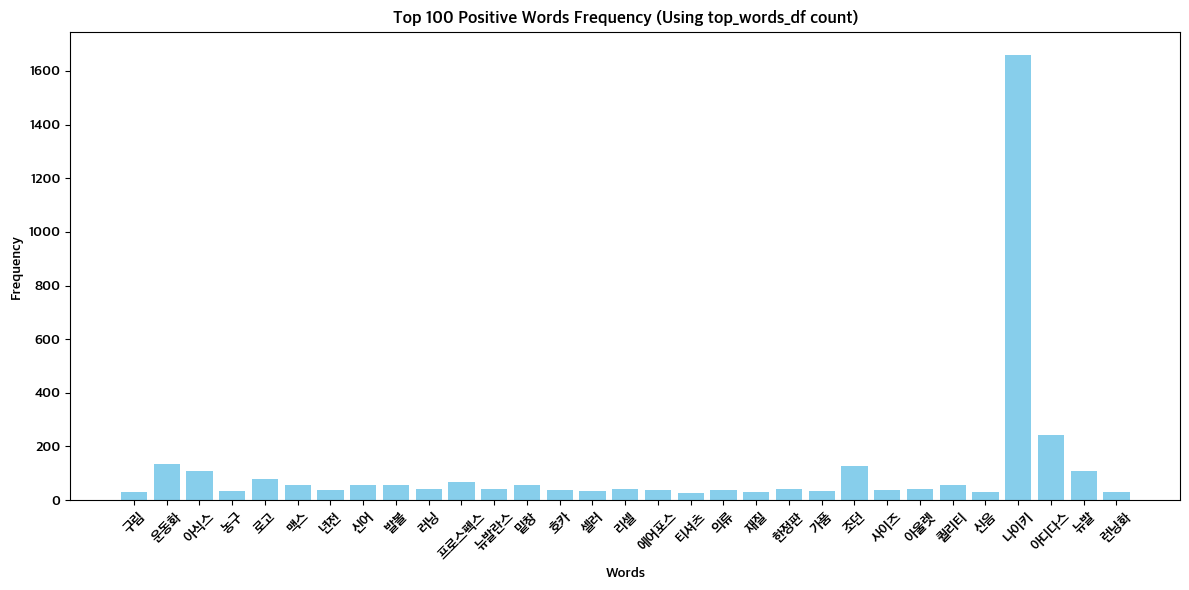

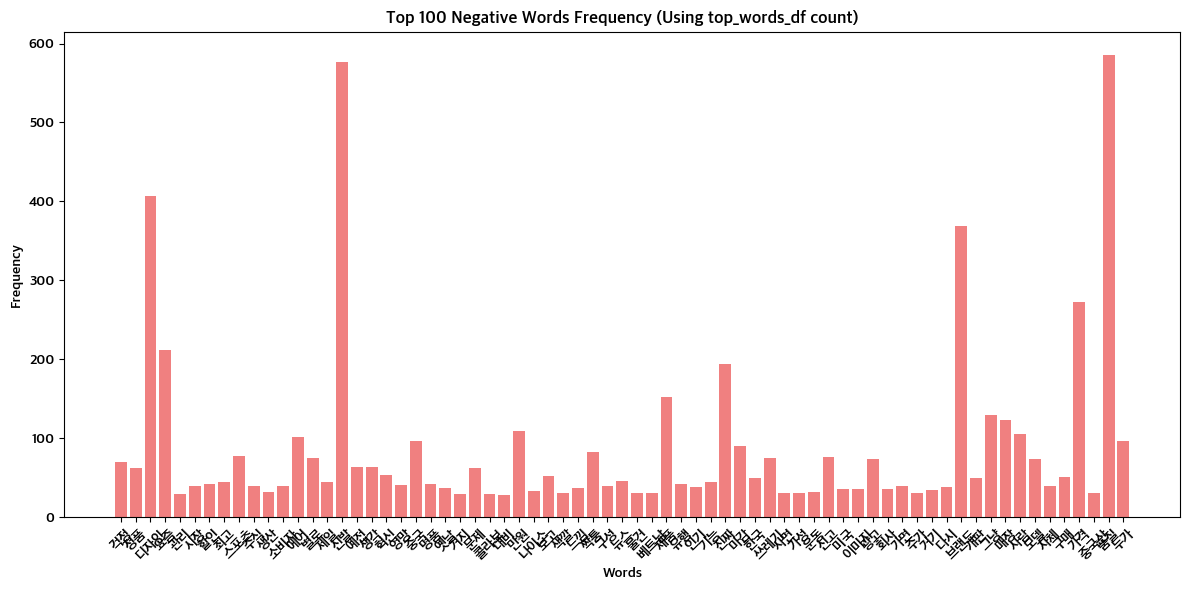

In [495]:
# 긍정적 단어 빈도 분석 및 바 차트 생성
if positive_words:
    positive_word_counts = Counter(positive_words)
    positive_df = pd.DataFrame(positive_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)

    # 병합하여 top_words_df의 'count' 값을 사용
    p = pd.merge(positive_df, top_words_df, on='word', how='left')
    
    # top_words_df의 'count'로 그래프 생성
    plt.figure(figsize=(12, 6))
    plt.bar(p['word'], p['count'], color='skyblue')  # top_words_df의 'count'를 참조
    plt.title("Top 100 Positive Words Frequency (Using top_words_df count)")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("positive_words_bar_chart(100).png")
    plt.show()
else:
    print("No positive words found for the bar chart.")

# 부정적 단어 빈도 분석 및 바 차트 생성
if negative_words:
    negative_word_counts = Counter(negative_words)
    negative_df = pd.DataFrame(negative_word_counts.items(), columns=['word', 'Count']).sort_values(by='Count', ascending=False)

    # 병합하여 top_words_df의 'count' 값을 사용
    n = pd.merge(negative_df, top_words_df, on='word', how='left')

    # top_words_df의 'count'로 그래프 생성
    plt.figure(figsize=(12, 6))
    plt.bar(n['word'], n['count'], color='lightcoral')  # top_words_df의 'count'를 참조
    plt.title("Top 100 Negative Words Frequency (Using top_words_df count)")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("negative_words_bar_chart(100).png")
    plt.show()
else:
    print("No negative words found for the bar chart.")
